In [2]:
# import torch_geometric

In [ ]:
target_path = "../DATN_data/robo_sorted/v0_v10_yolo/DATA_CHUP_yolo/labels"
predict_path = "../yolov5/runs/detect/exp18/labels"


: 

In [ ]:
import os
predict_file = os.listdir(predict_path)
target_file = os.listdir(target_path)
print("len predict_file: ", len(predict_file))
print("len target_file: ", len(target_file))

len predict_file:  402
len target_file:  432


: 

In [ ]:
predict_list = []
target_list = []
for predict_name in predict_file:
    with open(os.path.join(predict_path, predict_name), 'r') as f:
        line = f.readline()
        try:
            predict_list.append(int(line.split()[0]))
        except:
            print("error in predict")
    target_name = predict_name
    with open(os.path.join(target_path, target_name), 'r') as f:
        line = f.readline()
        try:
            target_list.append(int(line.split()[0]))
        except:
            print("error in target")
        
    

FileNotFoundError: [Errno 2] No such file or directory: '../DATN_data/robo_sorted/v0_v10_yolo/DATA_CHUP_yolo/labels/IMG_20220514_135722 - Copy.txt'

: 

: 

In [ ]:
## Khi co loi 
predict_list = []
target_list = []
for predict_name in predict_file:
    with open(os.path.join(predict_path, predict_name), 'r') as f:
        line = f.readline()
        try:
            predict_list.append(int(line.split()[0]))
        except:
            print("error in predict")
    target_name = predict_name
    try:
        with open(os.path.join(target_path, target_name), 'r') as f:
            line = f.readline()
            try:
                target_list.append(int(line.split()[0]))
            except:
                print("error in target")
    except:
        target_list.append(-1)

: 

In [ ]:
with open("../DATN_data/roboflow/v10/data.yaml") as f:
    line = f.readline()
    while line:
        if line.startswith("names:"):
            classes = eval(line.split(" ", 1)[1])
            break
        line = f.readline()
print(classes)  

['acecyst', 'acefalgan', 'agiclovir_800', 'agifovir_e', 'alphachymotrypsin', 'amlodipin_5', 'amlodipin_stada_5', 'amoxicilin', 'amoxycilin_500', 'augmentin', 'brodicef', 'buscopan', 'cabovis', 'cefxl', 'cepoxitil_200', 'cetirizin_10', 'cloviracinob_200', 'concor', 'cosele', 'dorogyne', 'duoplavin_75', 'enalapril', 'forxiga_10', 'gabarica_400', 'haginat_250', 'hapacol', 'hezepril_10', 'itametazin', 'januvia', 'levothyrox_100', 'lipistad_10', 'lipistad_20', 'liverbil', 'lostad', 'metformin_stella', 'otibsil_40', 'paracetamol', 'powbrain', 'rovamycine_3', 'scolanzo', 'siofor_1000', 'siofor_500', 'tanakan', 'toropi_20', 'trimpolmr', 'vinpocetin_5', 'vocanz_80', 'xatral_sr_5', 'zanedip']


: 

In [ ]:
predict_label = [classes[i] for i in predict_list]
target_label = [classes[i] for i in target_list]

: 

In [ ]:
print("len of predict_label: ", len(predict_label))
print("len of target_label: ", len(target_label))


len of predict_label:  402
len of target_label:  402


: 

In [ ]:
# check the number file in folder predict
import os 
file_list = os.listdir(predict_path)
len(file_list)

402

: 

In [ ]:
label_fit_distinct = target_list + predict_list
label_fit_distinct = list(set(label_fit_distinct))

: 

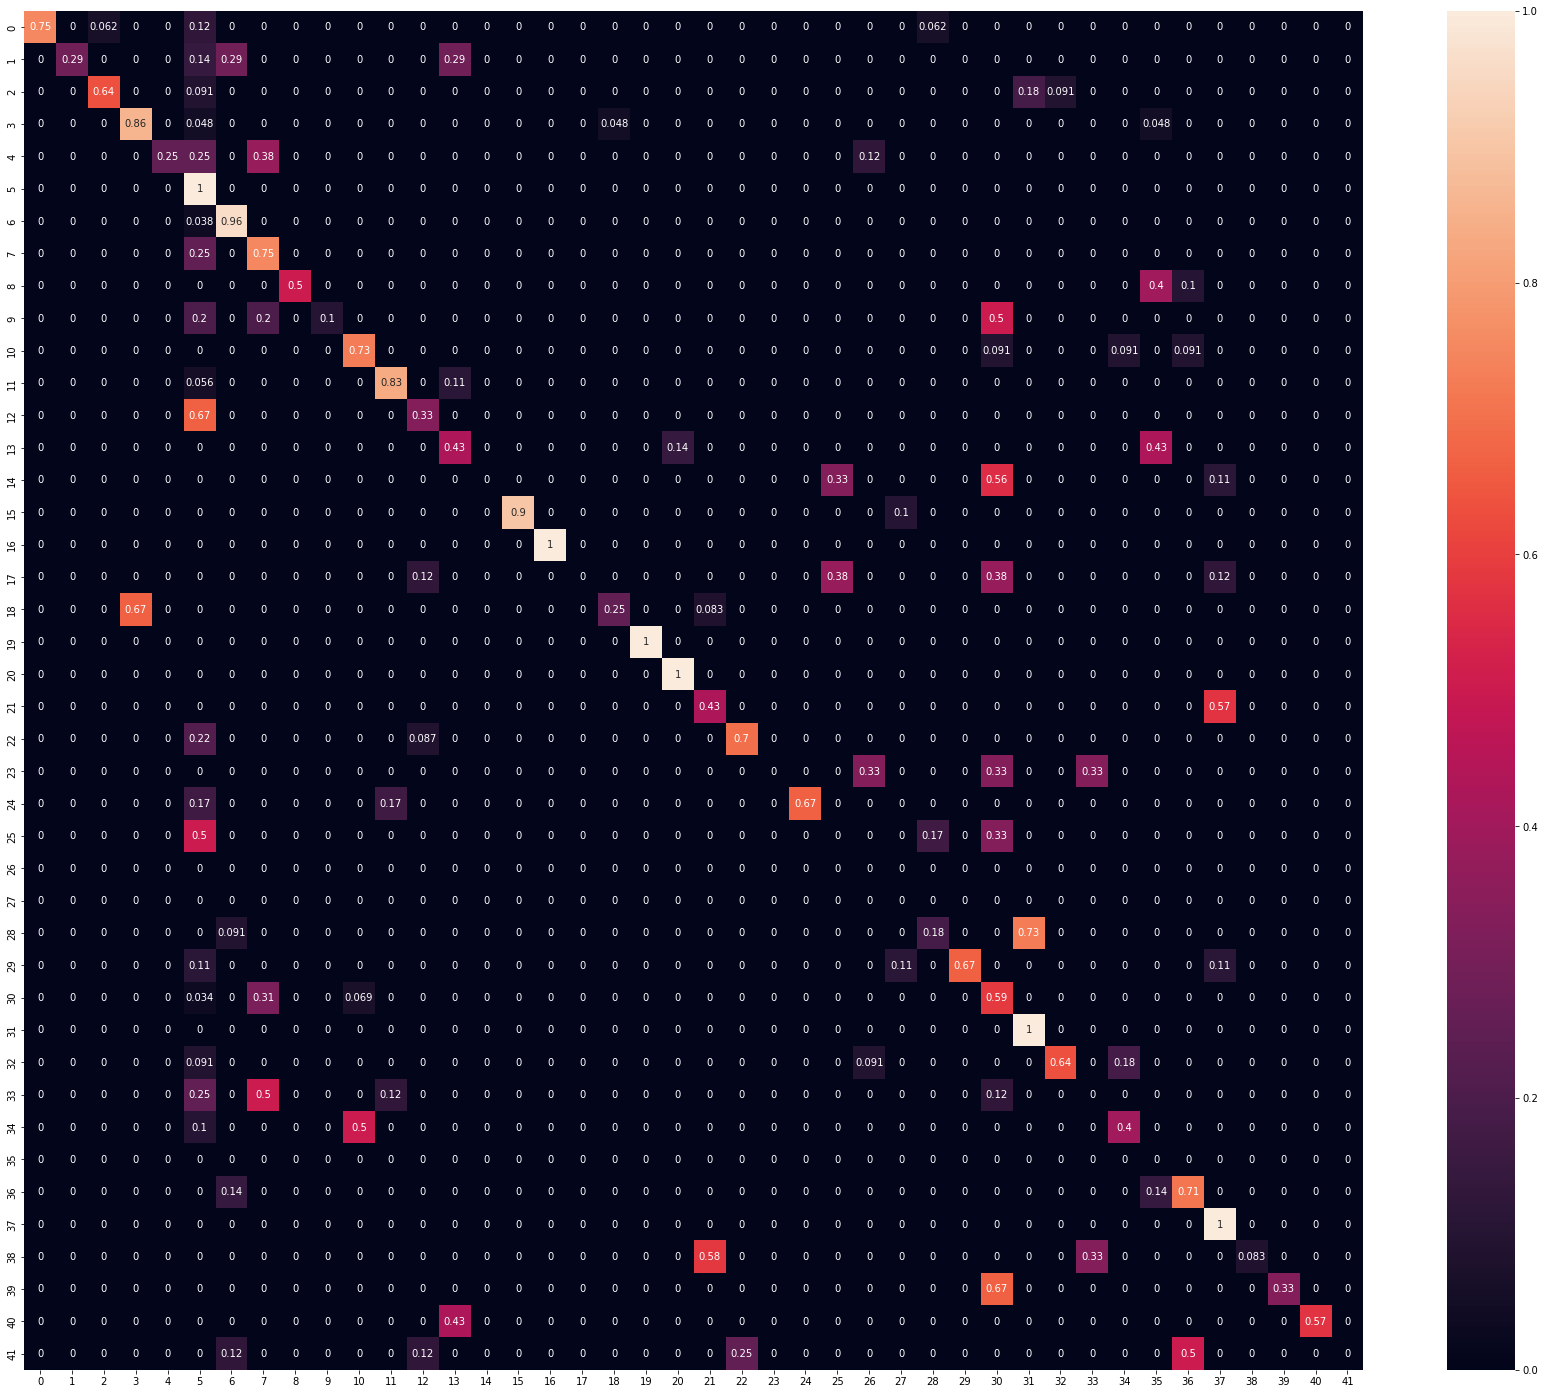

: 

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cf_matrix =  confusion_matrix(target_list, predict_list, labels=[i for i in label_fit_distinct], normalize= "true")
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df_cm = pd.DataFrame(cf_matrix)
plt.figure(figsize = (30, 25))
sns.heatmap(df_cm, annot = True)
plt.show()

In [ ]:
label_fit_distinct[30]

35

: 

: 

: 

: 

: 

: 

: 

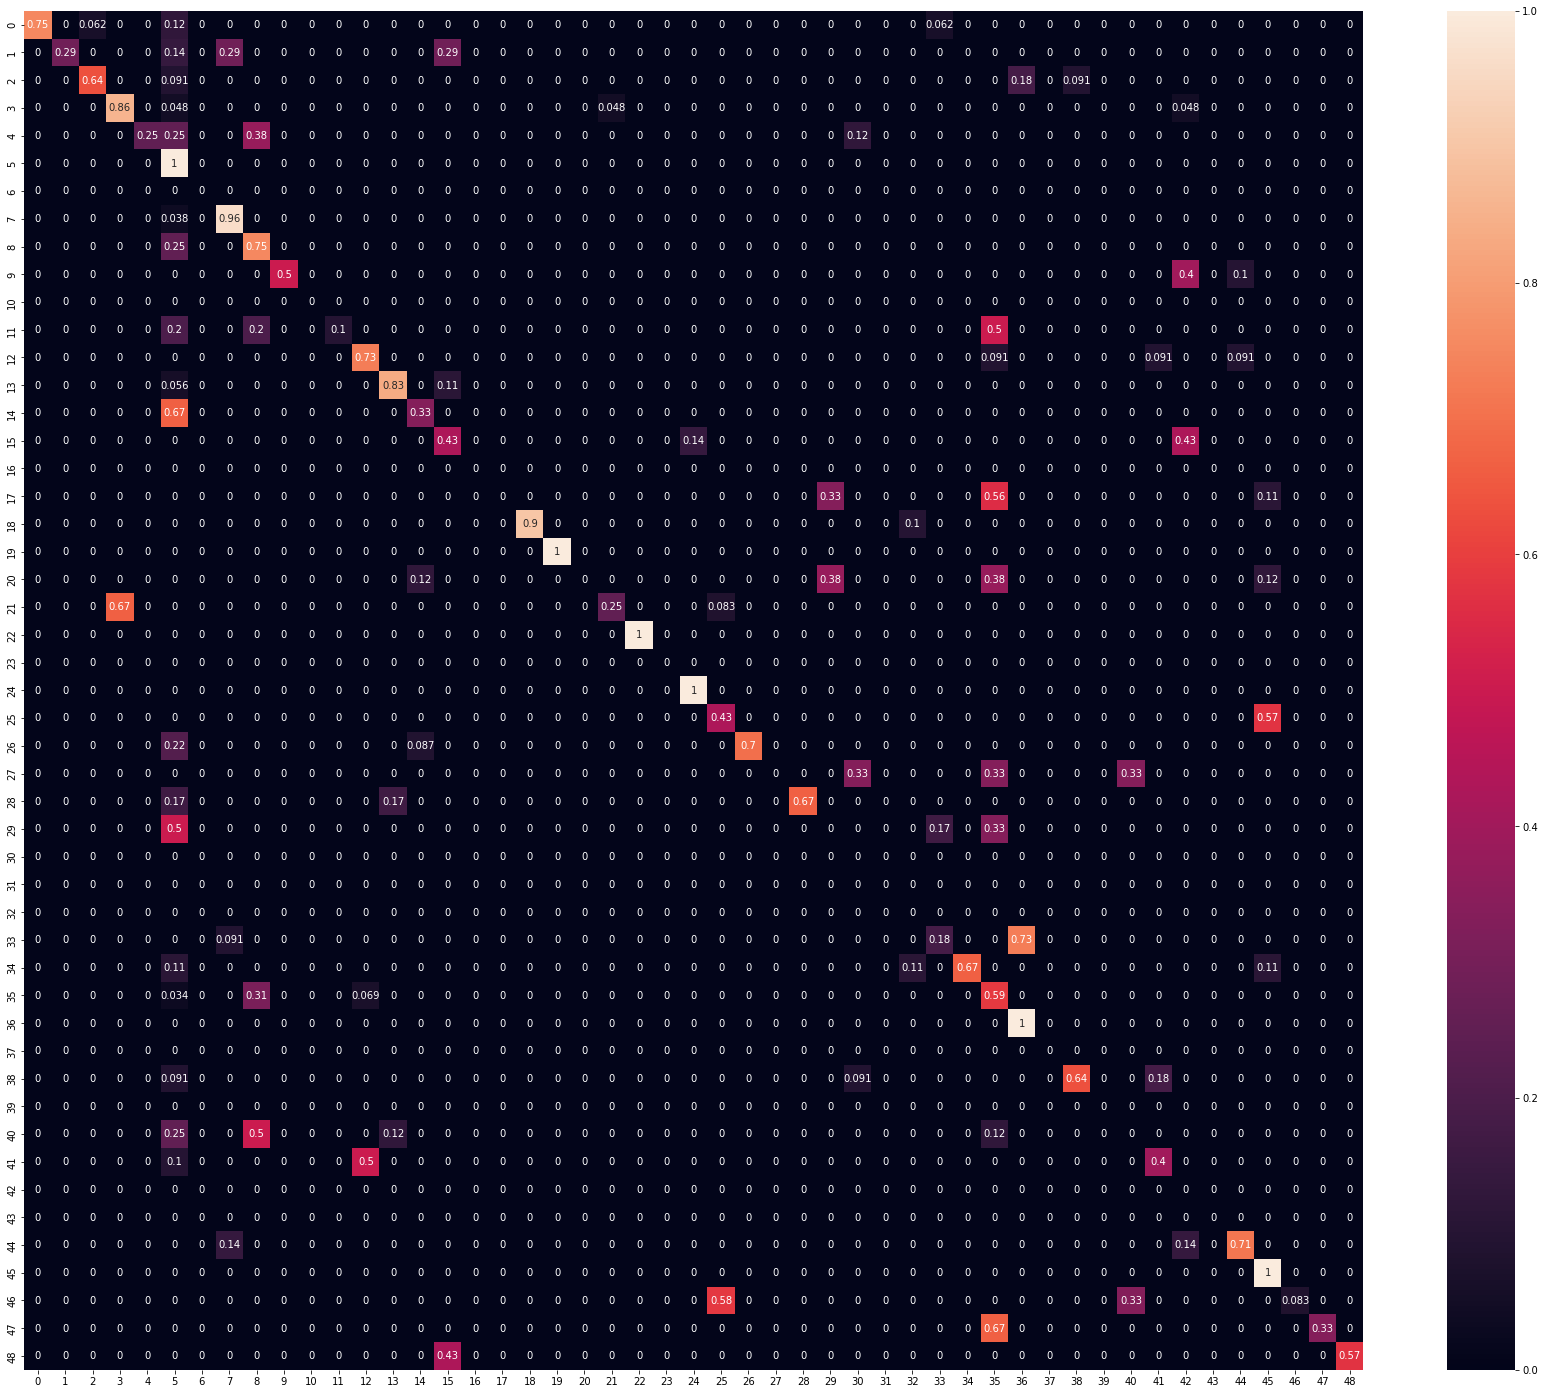

: 

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cf_matrix =  confusion_matrix(target_list, predict_list, labels=[i for i in range(len(classes))], normalize= "true")
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df_cm = pd.DataFrame(cf_matrix)
plt.figure(figsize = (30, 25))
sns.heatmap(df_cm, annot = True)
plt.show()

In [ ]:
for target, predict in zip(target_list, predict_list):
    if target != predict:
        print(target, predict)
        print(classes[target], classes[predict])
    
    

35 21
otibsil_40 enalapril
35 21
otibsil_40 enalapril
35 46
otibsil_40 vocanz_80
8 38
amoxycilin_500 rovamycine_3
32 15
liverbil cetirizin_10
35 27
otibsil_40 itametazin


: 

: 

: 

: 

: 

: 

: 

In [ ]:
classes[35]

'otibsil_40'

: 

: 

: 

: 

: 

: 

: 

In [ ]:
path = "../DATN_data/v10/test/labels"
len(os.listdir(path))

FileNotFoundError: [Errno 2] No such file or directory: '../DATN_data/v10/test/labels'

: 

: 

: 

: 

: 

: 

: 

#in ra xem phân phối tạp train như thế nào 

<AxesSubplot:title={'center':'test set'}>

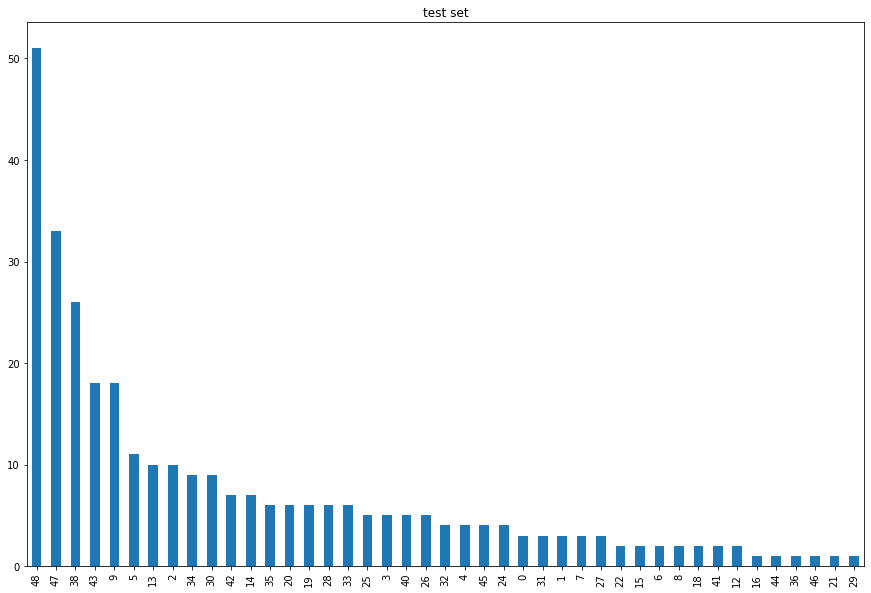

: 

: 

: 

: 

: 

: 

In [ ]:
import pandas as pd
import numpy as np

ground_truth = []
for file_name in target_file:
    with open(os.path.join(target_path, file_name), 'r') as f:
        line = f.readline()
        ground_truth.append(line.split()[0])
        
target_series =  pd.Series(ground_truth)
target_values_count = target_series.value_counts()
target_values_count.plot(kind = "bar", title = "test set", figsize = (15, 10))        
   

# ACC

In [ ]:
count = 0
for index, value_predict in enumerate(predict_list):
    if value_predict == target_list[index]:
        count += 1
 
print("acc = ", count/len(predict_list))

acc =  0.5696517412935324


: 

# fix class name in the labels file 

In [ ]:
folder_type = "test"
root_label_folder = ""

: 

: 

: 

: 

: 

: 

In [3]:
print("a")

a
